# Importing necessary libraries

In [ ]:
# import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import pickle
import warnings
warnings.simplefilter("ignore")

# Load dataset

In [ ]:
df = pd.read_csv("UpdatedResumeDataSet.csv")
df.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [13]:
print(f"Dataset contains {df.shape[0]} rows and {df.shape[1]} columns.")

Dataset contains 962 rows and 2 columns.


# Visualizing category distribution

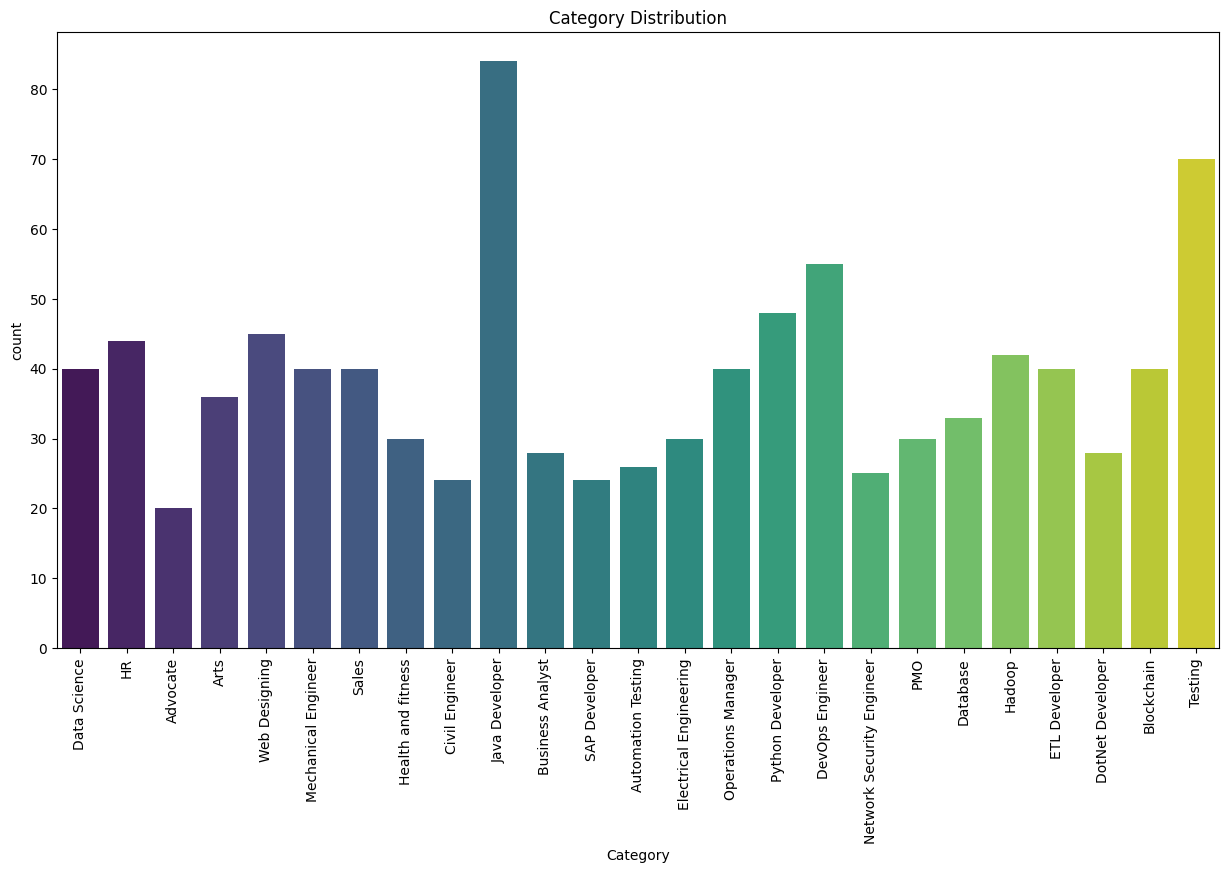

In [16]:
plt.figure(figsize=(15, 8))
sns.countplot(x=df["Category"], palette="viridis")
plt.xticks(rotation=90)
plt.title("Category Distribution")
plt.show()

# Unique categories and their counts

In [23]:
category_counts = df['Category'].value_counts()
print("Unique Categories:", df['Category'].unique())
print("\n\nCategory Counts:\n", category_counts)

Unique Categories: ['Data Science' 'HR' 'Advocate' 'Arts' 'Web Designing'
 'Mechanical Engineer' 'Sales' 'Health and fitness' 'Civil Engineer'
 'Java Developer' 'Business Analyst' 'SAP Developer' 'Automation Testing'
 'Electrical Engineering' 'Operations Manager' 'Python Developer'
 'DevOps Engineer' 'Network Security Engineer' 'PMO' 'Database' 'Hadoop'
 'ETL Developer' 'DotNet Developer' 'Blockchain' 'Testing']


Category Counts:
 Category
Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Sales                        40
Data Science                 40
Mechanical Engineer          40
ETL Developer                40
Blockchain                   40
Operations Manager           40
Arts                         36
Database                     33
Health and fitness           30
PMO                          30
Electrical 

# Pie chart visualization

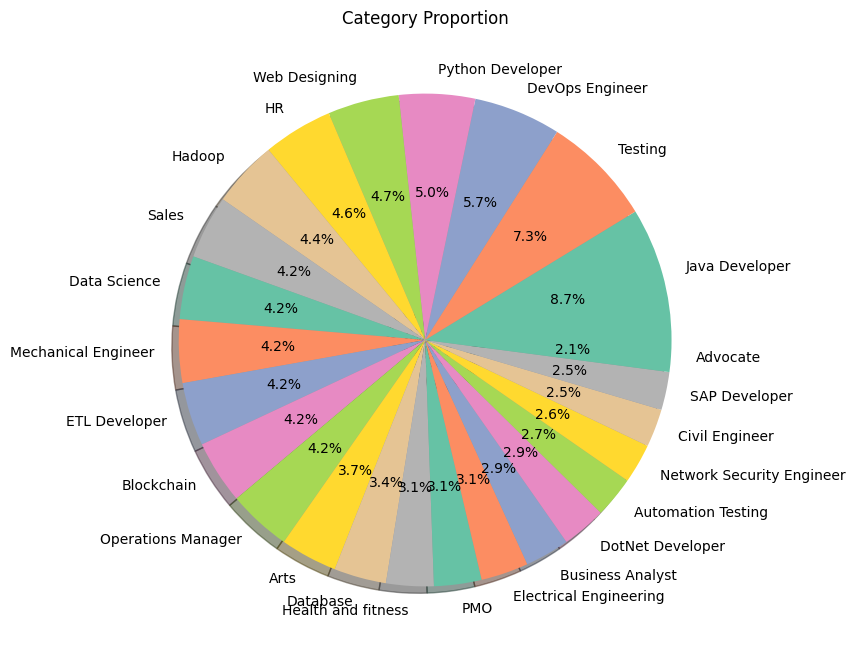

In [26]:
plt.figure(figsize=(12, 8))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', shadow=True, colors=sns.color_palette("Set2"))
plt.title("Category Proportion")
plt.show()

# **Cleaning the Resume Text**

In [31]:
import re
def CleanResume(txt):
    cleantxt = re.sub('http\S+\s', ' ', txt)
    cleantxt = re.sub('RT|cc', ' ', cleantxt)
    cleantxt = re.sub('#\S+\s', ' ', cleantxt)
    cleantxt = re.sub('@\S+', ' ', cleantxt)
    cleantxt = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), '', cleantxt)
    cleantxt = re.sub(r'[^\x00-\x7f]', ' ', cleantxt)
    cleantxt = re.sub('\s+', ' ', cleantxt)
    return cleantxt

df['UpdatedResume'] = df['Resume'].apply(CleanResume)
df.head()

,Category,Resume,UpdatedResume
0,Data Science,Skills * Programming Languages: Python (pandas...,Skills Programming Languages Python pandas num...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,Education Details May 2013 to May 2017 BE UITR...
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",Areas of Interest Deep Learning Control System...
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,Skills R Python SAP HANA Tableau SAP HANA SQL ...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",Education Details MCA YMCAUST Faridabad Haryan...


# Encoding the Categories

In [36]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Category'] = le.fit_transform(df['Category'])
df.head()

,Category,Resume,UpdatedResume
0,6,Skills * Programming Languages: Python (pandas...,Skills Programming Languages Python pandas num...
1,6,Education Details \r\nMay 2013 to May 2017 B.E...,Education Details May 2013 to May 2017 BE UITR...
2,6,"Areas of Interest Deep Learning, Control Syste...",Areas of Interest Deep Learning Control System...
3,6,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,Skills R Python SAP HANA Tableau SAP HANA SQL ...
4,6,"Education Details \r\n MCA YMCAUST, Faridab...",Education Details MCA YMCAUST Faridabad Haryan...


# Saving the mapping for later use

In [41]:
category_mapping = dict(zip(df['Category'], le.classes_))

# Dropping the original resume column for clarity

In [46]:
df1 = df.drop(columns='Resume')
df1.head()

,Category,UpdatedResume
0,6,Skills Programming Languages Python pandas num...
1,6,Education Details May 2013 to May 2017 BE UITR...
2,6,Areas of Interest Deep Learning Control System...
3,6,Skills R Python SAP HANA Tableau SAP HANA SQL ...
4,6,Education Details MCA YMCAUST Faridabad Haryan...


# **Feature Extraction using TF-IDF**

In [49]:
tfidf = TfidfVectorizer(stop_words='english', max_features=5000)
tfidf_features = tfidf.fit_transform(df1['UpdatedResume'])

# Splitting the dataset

In [52]:
X_train, X_test, y_train, y_test = train_test_split(tfidf_features, df1['Category'], test_size=0.2, random_state=42)

print(f"Training Data Shape: {X_train.shape}")
print(f"Testing Data Shape: {X_test.shape}")

Training Data Shape: (769, 5000)
Testing Data Shape: (193, 5000)


# **Model Selection and Training**

# Logistic Regression

In [56]:
log_clf = LogisticRegression(max_iter=200, random_state=42)
log_clf.fit(X_train, y_train)
log_pred = log_clf.predict(X_test)
log_acc = accuracy_score(y_test, log_pred)

print("Logistic Regression Accuracy:", log_acc)

Logistic Regression Accuracy: 0.9948186528497409


# Random Forest Classifier

In [59]:
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)
rf_acc = accuracy_score(y_test, rf_pred)

print("Random Forest Accuracy:", rf_acc)

Random Forest Accuracy: 0.9948186528497409


# Comparing Model Performance

In [62]:
model_performance = pd.DataFrame({
    "Model": ["Logistic Regression", "Random Forest"],
    "Accuracy": [log_acc, rf_acc]
})

print(model_performance)

                 Model  Accuracy
0  Logistic Regression  0.994819
1        Random Forest  0.994819


# **Best Model Selection**

In [65]:
best_model = rf_clf if rf_acc > log_acc else log_clf
print(f"Best Model Selected: {'Random Forest' if rf_acc > log_acc else 'Logistic Regression'}")

Best Model Selected: Logistic Regression


# Saving the best model and TF-IDF Vectorizer

In [68]:
pickle.dump(tfidf, open('tfidf.pkl', 'wb'))
pickle.dump(best_model, open('best_model.pkl', 'wb'))

# **Classification Report for Best Model**

In [73]:
# Ensure that the target names are strings
target_names = le.classes_.astype(str) 

# Predict using the best model
best_pred = best_model.predict(X_test)

# Print the classification report
print("Classification Report:\n", classification_report(y_test, best_pred, target_names=target_names))

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00         7
           4       1.00      1.00      1.00         4
           5       1.00      1.00      1.00         9
           6       1.00      1.00      1.00         5
           7       1.00      1.00      1.00         8
           8       1.00      0.93      0.96        14
           9       1.00      1.00      1.00         5
          10       1.00      1.00      1.00         7
          11       1.00      1.00      1.00         6
          12       1.00      1.00      1.00        12
          13       1.00      1.00      1.00         4
          14       1.00      1.00      1.00         7
          15       1.00      1.00      1.00        15
          16       1.00      1.00      1.00         8
   